**Kelompok 11**

Anggota :

**1.Adini Riska Putri**

**2.Alfian Rohmayuda**

**3.Ardhelia Intan**

# Project Guideline

Hi teman-teman! Silakan menggunakan template notebook ini untuk mengerjakan projectmu.

<br>

**Informasi tambahan,**
1. Copy notebook ini untuk mulai mengerjakan Projectmu.
2. Kamu bebas untuk menambahkan cell pada notebook.

## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [30]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Memasukkan library yang akan kamu gunakan

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Mengambil file .csv dari Google Drive kamu.

In [31]:
dates = pd.date_range(start="2025-01-01", end="2025-01-30")


In [32]:
np.random.seed(42)
data = {
    "Tanggal": dates,
    "PM2.5": np.random.randint(20, 150, size=len(dates)),
    "PM10": np.random.randint(30, 200, size=len(dates)),
    "CO": np.round(np.random.uniform(0.2, 1.2, size=len(dates)), 2),
    "NO2": np.random.randint(10, 80, size=len(dates)),
    "O3": np.random.randint(5, 50, size=len(dates))
}

## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [33]:
df = pd.DataFrame(data)
df["AQI"] = (0.5 * df["PM2.5"] + 0.3 * df["PM10"] + 10 * df["CO"] + 0.2 * df["NO2"] + 0.1 * df["O3"]).astype(int)

df.head()

,Tanggal,PM2.5,PM10,CO,NO2,O3,AQI
0,2025-01-01,122,164,0.98,21,11,125
1,2025-01-02,112,50,1.14,43,26,93
2,2025-01-03,34,102,1.09,42,32,70
3,2025-01-04,126,196,0.80,57,6,141
4,2025-01-05,91,47,1.12,32,46,81


## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

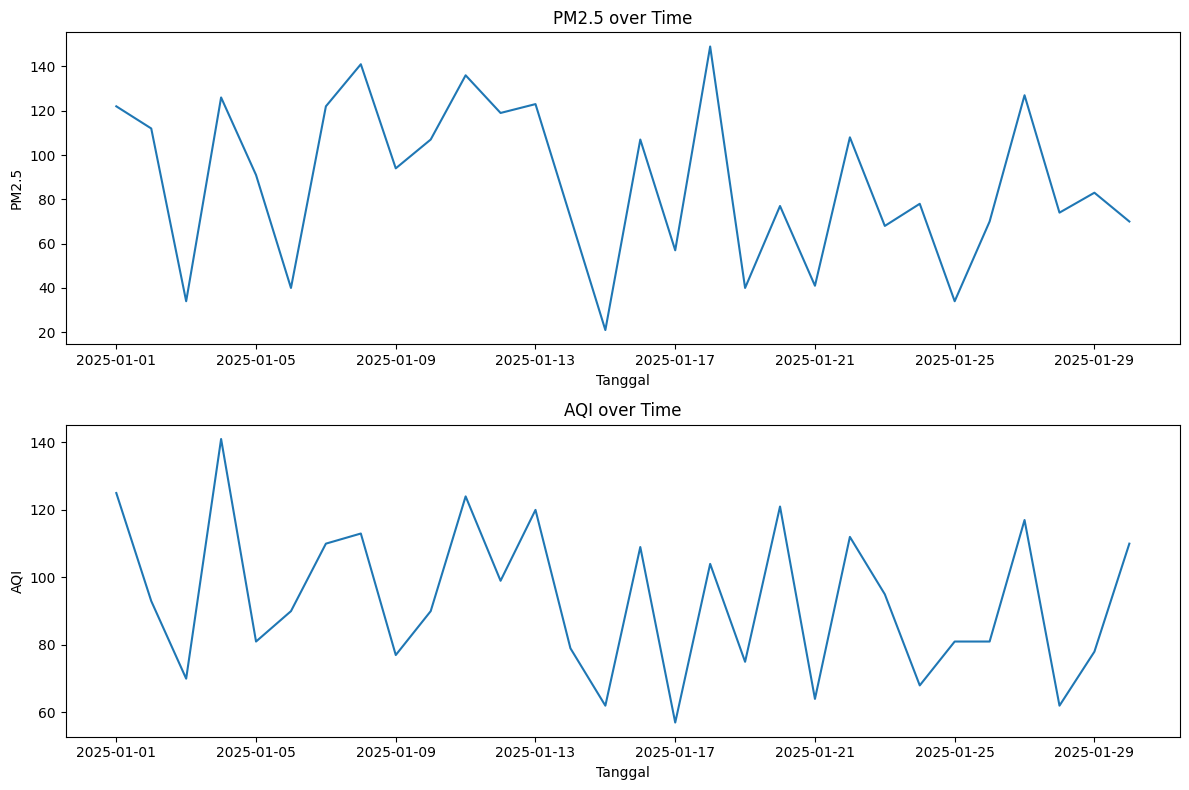

In [43]:
import os

eda_fig, axs = plt.subplots(2, 1, figsize=(12, 8))
sns.lineplot(data=df, x='Tanggal', y='PM2.5', ax=axs[0])
axs[0].set_title('PM2.5 over Time')

sns.lineplot(data=df, x='Tanggal', y='AQI', ax=axs[1])
axs[1].set_title('AQI over Time')

plt.tight_layout()

eda_fig_path = "/mnt/data/eda_plot.png"
os.makedirs(os.path.dirname(eda_fig_path), exist_ok=True)

eda_fig.savefig(eda_fig_path)


## Data Preparation

Memisahkan data training dan testing

In [35]:
features = ['PM2.5', 'PM10', 'CO', 'NO2', 'O3']
X = df[features]
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

(0.10204674360997097, 0.999667960704089, '/mnt/data/eval_plot.png')

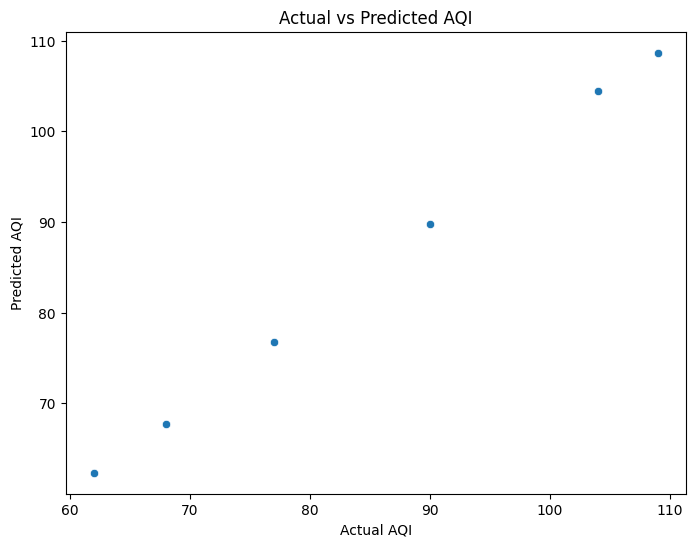

In [44]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

eval_fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, ax=ax)
ax.set_xlabel("Actual AQI")
ax.set_ylabel("Predicted AQI")
ax.set_title("Actual vs Predicted AQI")

eval_fig_path = "/mnt/data/eval_plot.png"

# Buat folder jika belum ada
os.makedirs(os.path.dirname(eval_fig_path), exist_ok=True)

eval_fig.savefig(eval_fig_path)

mse, r2, eval_fig_path
